In [58]:
import copy
import sre_parse
import sre_constants
from importlib import reload

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import Path as MarkerPath
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection


In [415]:
import constants
reload(constants)
import solver
reload(solver)

<module 'solver' from '/data/Development/regex_crossword/solver.py'>

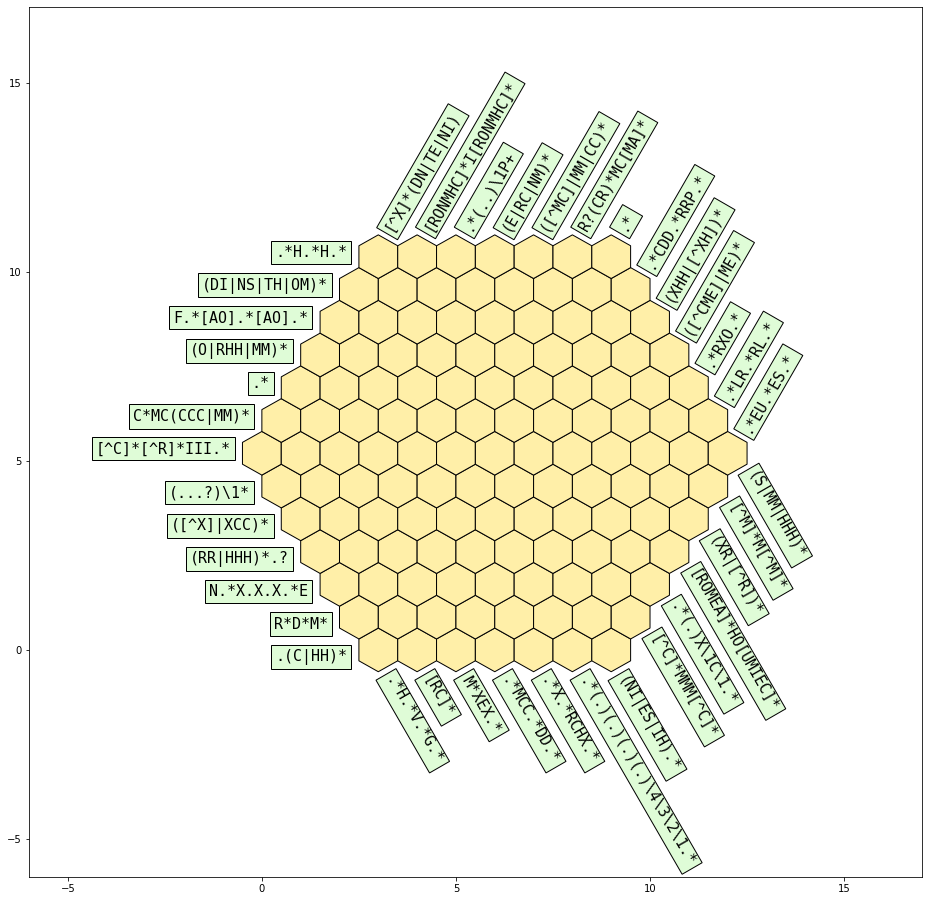

In [419]:
solver.draw_puzzel(fig_size=16, fontsize=15)

In [420]:
strings = solver.build_constraints()
len(strings)

39

In [422]:
strings

[<St pt='.*H.*H.*' cns=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]>,
 <St pt='(DI|NS|TH|OM)*' cns=[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]>,
 <St pt='F.*[AO].*[AO].*' cns=[(2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8)]>,
 <St pt='(O|RHH|MM)*' cns=[(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9)]>,
 <St pt='.*' cns=[(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10)]>,
 <St pt='C*MC(CCC|MM)*' cns=[(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)]>,
 <St pt='[^C]*[^R]*III.*' cns=[(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12)]>,
 <St pt='(...?)\\1*' cns=[(7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11)]>,
 <St pt='([^X]|XCC)*' cns=[(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9

In [393]:
pd.Series([len(s.constraints) for s in strings]).value_counts()

7     6
8     6
9     6
10    6
11    6
12    6
13    3
dtype: int64

In [394]:
cells = list({id(c.cell):c.cell for s in strings for c in s.constraints}.values())
len(cells)

127

In [395]:
pd.Series([len(c.constraints) for c in cells]).value_counts()

3    127
dtype: int64

In [396]:
constraints = pd.DataFrame([
    {'str': s.pattern.pattern, 'cell': cells.index(c.cell), 'index': c.index }
    for s in strings for c in s.constraints
])
constraints

,str,cell,index
0,.*H.*H.*,0,0
1,.*H.*H.*,1,1
2,.*H.*H.*,2,2
3,.*H.*H.*,3,3
4,.*H.*H.*,4,4
...,...,...,...
376,(S|MM|HHH)*,92,2
377,(S|MM|HHH)*,102,3
378,(S|MM|HHH)*,111,4
379,(S|MM|HHH)*,119,5


In [397]:
assert len(constraints.drop_duplicates()) == len(constraints)

In [398]:
c = cells[20]
print(c.position)
print(len(c.constraints))
display([[cn.string.pattern.pattern, cn.index] for cn in c.constraints])

(2, 5)
3


[['F.*[AO].*[AO].*', 5],
 ['R?(CR)*MC[MA]*', 9],
 ['.*(.)(.)(.)(.)\\4\\3\\2\\1.*', 2]]

In [328]:
mid

6

In [332]:
x, y, i, j

(0, 7, 7, 0)

In [342]:
plt.scatter?

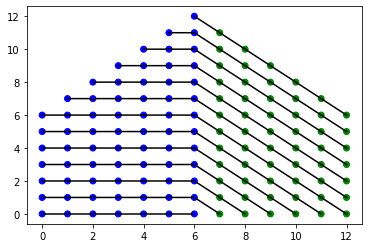

In [352]:
plt.plot()
for i, s in enumerate(constants.x):
    points = []
    start = max(0, i-mid)
    end = min(i + mid + 1, constants.size)
    for j in range(start, end):
        x = j
        y = i if j <= mid else mid + i - j
        points.append([x, y, y >= solver.row_size(x),
                       'b' if j <= mid else 'g'])
    x, y, inv, c = map(np.array, zip(*points))
    plt.scatter(x, y, c=c)
    plt.plot(x, y, 'k-')
    if any(inv):
        plt.scatter(x[inv], y[inv], c='r', marker='*', s=200)

    

In [14]:
patterns = pd.DataFrame(
    [{'dim': dim, 'ix':ix, 'pat': pat}
        for dim, pats in constants.dims.items()
        for ix, pat in enumerate(pats)
    ])
patterns

,dim,ix,pat
0,x,0,[^X]*(DN|TE|NI)
1,x,1,[RONMHC]*I[RONMHC]*
2,x,2,.*(..)\1P+
3,x,3,(E|RC|NM)*
4,x,4,([^MC]|MM|CC)*
5,x,5,R?(CR)*MC[MA]*
6,x,6,.*
7,x,7,.*CDD.*RRP.*
8,x,8,(XHH|[^XH])*
9,x,9,([^CME]|ME)*


In [15]:
parsed = [sre_parse.parse(s) for s in patterns['pat']]

In [19]:
patterns['low'], patterns['high'] = zip(*(p.getwidth() for p in parsed))

In [20]:
patterns

,dim,ix,pat,low,high
0,x,0,[^X]*(DN|TE|NI),2,4294967295
1,x,1,[RONMHC]*I[RONMHC]*,1,4294967295
2,x,2,.*(..)\1P+,5,4294967295
3,x,3,(E|RC|NM)*,0,4294967295
4,x,4,([^MC]|MM|CC)*,0,4294967295
5,x,5,R?(CR)*MC[MA]*,2,4294967295
6,x,6,.*,0,4294967295
7,x,7,.*CDD.*RRP.*,6,4294967295
8,x,8,(XHH|[^XH])*,0,4294967295
9,x,9,([^CME]|ME)*,0,4294967295


In [25]:
ops = pd.DataFrame([dict(pix=pix, op=op, arg=arg)
              for pix,p in enumerate(parsed) for op,arg in p.data], dtype=object)
ops

,pix,op,arg
0,0,MAX_REPEAT,"(0, MAXREPEAT, [(NOT_LITERAL, 88)])"
1,0,SUBPATTERN,"(1, 0, 0, [(BRANCH, (None, [[(LITERAL, 68), (L..."
2,1,MAX_REPEAT,"(0, MAXREPEAT, [(IN, [(LITERAL, 82), (LITERAL,..."
3,1,LITERAL,73
4,1,MAX_REPEAT,"(0, MAXREPEAT, [(IN, [(LITERAL, 82), (LITERAL,..."
...,...,...,...
147,36,MAX_REPEAT,"(0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC..."
148,37,MAX_REPEAT,"(0, MAXREPEAT, [(NOT_LITERAL, 77)])"
149,37,LITERAL,77
150,37,MAX_REPEAT,"(0, MAXREPEAT, [(NOT_LITERAL, 77)])"


In [32]:
ops['op'].map(str).value_counts()

MAX_REPEAT    74
LITERAL       57
SUBPATTERN     9
GROUPREF       7
ANY            3
IN             2
Name: op, dtype: int64

In [40]:
ops.groupby('op').apply(lambda df : df.sample(2))

pix          op                                                arg
op                                                                       
2  81   23         ANY                                               None
   79   23         ANY                                               None
12 124  31    GROUPREF                                                  4
   141  34    GROUPREF                                                  1
14 55   15          IN                     [(LITERAL, 65), (LITERAL, 79)]
   57   15          IN                     [(LITERAL, 65), (LITERAL, 79)]
17 63   18     LITERAL                                                 67
   104  29     LITERAL                                                 77
26 129  32  SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 78), (L...
   122  31  SUBPATTERN                           (3, 0, 0, [(ANY, None)])
42 77   23  MAX_REPEAT                      (0, MAXREPEAT, [(ANY, None)])
   58   15  MAX_REPEAT                      (0, MAXREPEAT, [(ANY, None)])

In [37]:
for i,row in patterns.sample(n=10, random_state=0xCAFE).iterrows():
    display(row.to_frame().T)
    parsed[i].dump()
    print('-'*80)

,dim,ix,pat,low,high
33,z,7,[^C]*MMM[^C]*,3,4294967295


MAX_REPEAT 0 MAXREPEAT
  NOT_LITERAL 67
LITERAL 77
LITERAL 77
LITERAL 77
MAX_REPEAT 0 MAXREPEAT
  NOT_LITERAL 67
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
26,z,0,.*H.*V.*G.*,3,4294967295


MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 72
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 86
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 71
MAX_REPEAT 0 MAXREPEAT
  ANY None
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
31,z,5,.*(.)(.)(.)(.)\4\3\2\1.*,8,4294967295


MAX_REPEAT 0 MAXREPEAT
  ANY None
SUBPATTERN 1 0 0
  ANY None
SUBPATTERN 2 0 0
  ANY None
SUBPATTERN 3 0 0
  ANY None
SUBPATTERN 4 0 0
  ANY None
GROUPREF 4
GROUPREF 3
GROUPREF 2
GROUPREF 1
MAX_REPEAT 0 MAXREPEAT
  ANY None
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
3,x,3,(E|RC|NM)*,0,4294967295


MAX_REPEAT 0 MAXREPEAT
  SUBPATTERN 1 0 0
    BRANCH
      LITERAL 69
    OR
      LITERAL 82
      LITERAL 67
    OR
      LITERAL 78
      LITERAL 77
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
11,x,11,.*LR.*RL.*,4,4294967295


MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 76
LITERAL 82
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 82
LITERAL 76
MAX_REPEAT 0 MAXREPEAT
  ANY None
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
23,y,10,N.*X.X.X.*E,7,4294967295


LITERAL 78
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 88
ANY None
LITERAL 88
ANY None
LITERAL 88
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 69
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
1,x,1,[RONMHC]*I[RONMHC]*,1,4294967295


MAX_REPEAT 0 MAXREPEAT
  IN
    LITERAL 82
    LITERAL 79
    LITERAL 78
    LITERAL 77
    LITERAL 72
    LITERAL 67
LITERAL 73
MAX_REPEAT 0 MAXREPEAT
  IN
    LITERAL 82
    LITERAL 79
    LITERAL 78
    LITERAL 77
    LITERAL 72
    LITERAL 67
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
7,x,7,.*CDD.*RRP.*,6,4294967295


MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 67
LITERAL 68
LITERAL 68
MAX_REPEAT 0 MAXREPEAT
  ANY None
LITERAL 82
LITERAL 82
LITERAL 80
MAX_REPEAT 0 MAXREPEAT
  ANY None
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
14,y,1,(DI|NS|TH|OM)*,0,4294967295


MAX_REPEAT 0 MAXREPEAT
  SUBPATTERN 1 0 0
    BRANCH
      LITERAL 68
      LITERAL 73
    OR
      LITERAL 78
      LITERAL 83
    OR
      LITERAL 84
      LITERAL 72
    OR
      LITERAL 79
      LITERAL 77
--------------------------------------------------------------------------------


,dim,ix,pat,low,high
0,x,0,[^X]*(DN|TE|NI),2,4294967295


MAX_REPEAT 0 MAXREPEAT
  NOT_LITERAL 88
SUBPATTERN 1 0 0
  BRANCH
    LITERAL 68
    LITERAL 78
  OR
    LITERAL 84
    LITERAL 69
  OR
    LITERAL 78
    LITERAL 73
--------------------------------------------------------------------------------


In [7]:
p = sre_parse.parse(constants.x[0])
p.dump()

MAX_REPEAT 0 MAXREPEAT
  NOT_LITERAL 88
SUBPATTERN 1 0 0
  BRANCH
    LITERAL 68
    LITERAL 78
  OR
    LITERAL 84
    LITERAL 69
  OR
    LITERAL 78
    LITERAL 73


In [8]:
p.data

[(MAX_REPEAT, (0, MAXREPEAT, [(NOT_LITERAL, 88)])),
 (SUBPATTERN,
  (1,
   0,
   0,
   [(BRANCH, (None, [[(LITERAL, 68), (LITERAL, 78)], [(LITERAL, 84), (LITERAL, 69)], [(LITERAL, 78), (LITERAL, 73)]]))]))]

In [9]:
p.getwidth()

(2, MAXREPEAT)

In [85]:
PatchCollection?

In [95]:
[solver.row_size(i) for i in range(constants.size)]

[7, 8, 9, 10, 11, 12, 13, 12, 11, 10, 9, 8, 7]

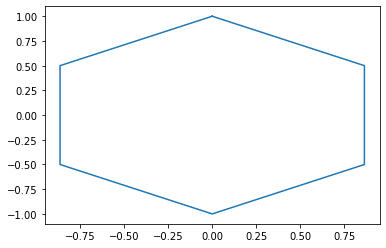

In [117]:
x,y = MarkerPath.unit_regular_polygon(6).vertices.T
plt.plot(x,y)

In [118]:
1 / (x.max() - x.min())

0.5773502691896256

In [119]:
1 / (y.max() - y.min())

0.5

In [122]:
0.577 / 0.5

1.154

(-5.0, 16.0)

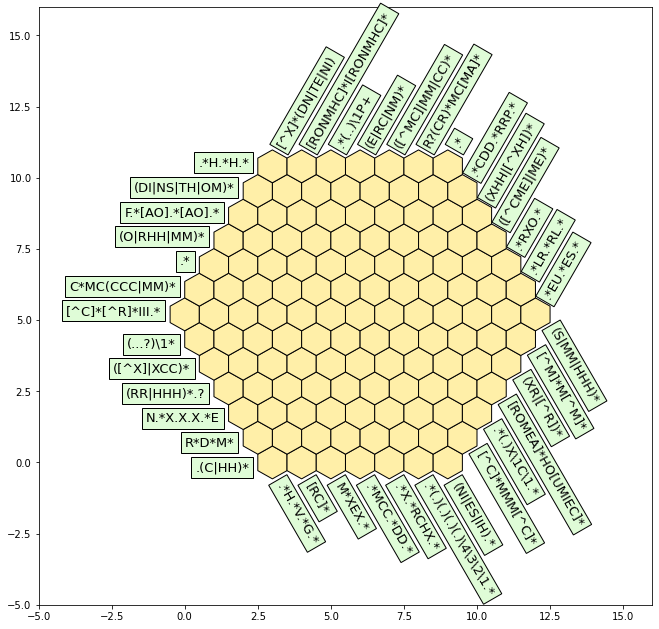

In [234]:
unit_hex = plt.Polygon(MarkerPath.unit_regular_polygon(6).vertices,
                       edgecolor='k', linewidth=1, fill=True, facecolor='#ffefa8')
unit_hex.set_transform(Affine2D().scale(0.577))

vscale = 1 / 1.154

def position(i, j):
    x = j + (constants.size - solver.row_size(i)) / 2.0
    y = i * vscale
    return x, y


patches = []
for i in range(constants.size):
    for j in range(solver.row_size(i)):
        x,y = position(i, j)
        patch = copy.copy(unit_hex)
        patch.set_transform(patch.get_transform() + Affine2D().translate(x, y))
        patches.append(patch)
        
p = PatchCollection(patches, match_original=True)


f = plt.figure(figsize=(11, 11))
ax = f.add_subplot(111)

ax.add_collection(p)

def text(x, y, s, **kwds):
    ax.text(x, y, s, fontsize=13, bbox=dict(facecolor='#dffcd7', edgecolor='k'), **kwds)

mid = constants.size // 2
for i,v in enumerate(constants.x[:mid + 1:]):
    x, y = position(12, i)
    text(x + 0.1, y + 0.7, v, rotation=60)
    
for i,v in enumerate(constants.x[mid + 1::]):
    r = constants.size - i - 1
    x, y = position(r, solver.row_size(r))
    text(x - 0.3, y - 0.3, v, rotation=60)
    
for i,v in enumerate(constants.y[:mid + 1:]):
    r = constants.size - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y, v, horizontalalignment='right')
    
for i,v in enumerate(constants.y[mid + 1::]):
    r = mid - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y - 0.3, v, horizontalalignment='right')
    
for i,v in enumerate(constants.z[:mid + 1:]):
    x, y = position(0, i)
    text(x + 0.15, y - 0.8, v, rotation=-60, rotation_mode='anchor')
    
for i,v in enumerate(constants.z[mid + 1::]):
    x, y = position(i, solver.row_size(i))
    text(x, y + 0.3, v, rotation=-60, rotation_mode='anchor')

ax.set_xlim(-5, 16)
ax.set_ylim(-5, 16)


In [75]:
patch._transform._mtx

array([[ 1.,  0., 12.],
       [ 0.,  1.,  6.],
       [ 0.,  0.,  1.]])

In [68]:
vars(patch)

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <AxesSubplot:>,
 'figure': <Figure size 504x504 with 1 Axes>,
 '_transform': <matplotlib.transforms.Affine2D at 0x7ff5580dafa0>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': <matplotlib.transforms.TransformedBbox at 0x7ff5580c01c0>,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': None,
 '_agg_filter': None,
 '_mouseover': False,
 'eventson': False,
 '_oid': 0,
 '_propobservers': {},
 '_remove_method': <function list.remove(value, /)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_hatch_color': (0.0, 0.0, 0.0, 1),
 '_fill': True,
 '_original_edgecolor': 'k',
 '_edgecolor': (0.0, 0.0, 0.0, 1),
 '_original_facecolor': None,
 '_facecolor': (0.12156862745098039,
  0.46666666666

In [57]:
ax.add_patch??